In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import json


In [2]:
# read data
with open('citidata.json', 'r') as f:
    response_list = json.load(f)

#### Step 1 Compare different skills in two or three jobs

In [3]:
# example 1
data_1_0 = response_list[0][0]
data_1_1 = response_list[1][0]
# example 2
data_2_0 = response_list[84][0]
data_2_1 = response_list[85][0]
# example 3
data_3_0 = response_list[447][0]
data_3_1 = response_list[448][0]
# example 4
data_4_0 = response_list[346][0]
data_4_1 = response_list[347][0]
# example 5
data_5_0 = response_list[37][0]
data_5_1 = response_list[38][0]

In [4]:
# function skill difference
def skill_difference(job1, job2):
    skill_0 = []
    skill_0_count = []
    for i in job1['skills']:
        for j in range(len(job1['skills'][i])):
            skill_0.append(job1['skills'][i][j]['name'])
            skill_0_count.append(job1['skills'][i][j]['count'])
    skill_1 = []
    skill_1_count = []
    for i in job2['skills']:
        for j in range(len(job2['skills'][i])):
            skill_1.append(job2['skills'][i][j]['name'])
            skill_1_count.append(job2['skills'][i][j]['count'])
    diff_skill = {job1['name']:[],job2['name']:[],'COMMON':[]}
    datadict01 = set(skill_0) | set(skill_1)
    for i in datadict01:
        if i in skill_0 and i in skill_1:
            diff_skill['COMMON'].append(i)
        elif i in skill_0:
            diff_skill[job1['name']].append(i)
        else:
            diff_skill[job2['name']].append(i)
#    print(diff_skill)
    return diff_skill

##############
# function salary difference
def salary_difference(job1,job2):
    salary_0 = {'mean': job1['salary']['mean']}
    for i in job1['salary']['distribution']:
        salary_0[i['key']] = i['value']
    #print(salary_0)
    salary_1 = {'mean': job2['salary']['mean']}
    for i in job2['salary']['distribution']:
        salary_1[i['key']] = i['value']
    #print(salary_1)
    salary0_values = np.array(list(salary_0.values()))
    #print(salary0_values)
    salary1_values = np.array(list(salary_1.values()))
    #print(salary1_values)
    salary_diff = salary1_values-salary0_values
    print('Difference:','\n',job1['name'],'-',job2['name'],'\n','Mean,10th,20th,25th,30th,40th,50th,60th,70th,75th,80th,90th')
    print(salary_diff)
    return salary_diff

###############
# function of skill difference between 3 jobs
def skill_difference_3(job1, job2, job3):
    skill_0 = []
    skill_0_count = []
    for i in job1['skills']:
        for j in range(len(job1['skills'][i])):
            skill_0.append(job1['skills'][i][j]['name'])
            skill_0_count.append(job1['skills'][i][j]['count'])
    skill_1 = []
    skill_1_count = []
    for i in job2['skills']:
        for j in range(len(job2['skills'][i])):
            skill_1.append(job2['skills'][i][j]['name'])
            skill_1_count.append(job2['skills'][i][j]['count'])
    skill_2 = []
    skill_2_count = []
    for i in job3['skills']:
        for j in range(len(job3['skills'][i])):
            skill_2.append(job3['skills'][i][j]['name'])
            skill_2_count.append(job3['skills'][i][j]['count'])
    diff_skill = {job1['name']:[],job2['name']:[],job3['name']:[],(job1['name'],job2['name']):[],(job1['name'],job3['name']):[],(job2['name'],job3['name']):[],'COMMON':[]}
    datadict01 = set(skill_0) | set(skill_1) | set(skill_2)
    for i in datadict01:
        if i in skill_0 and i in skill_1 and i in skill_2:
            diff_skill['COMMON'].append(i)
        elif i in skill_0 and i in skill_1:
            diff_skill[(job1['name'],job2['name'])].append(i)
        elif i in skill_0 and i in skill_2:
            diff_skill[(job1['name'],job3['name'])].append(i)
        elif i in skill_1 and i in skill_2:
            diff_skill[(job2['name'],job3['name'])].append(i)
        elif i in skill_0:
            diff_skill[job1['name']].append(i)
        elif i in skill_1:
            diff_skill[job2['name']].append(i)
        elif i in skill_2:
            diff_skill[job3['name']].append(i)
#    print(diff_skill)
    return diff_skill

In [5]:
skill_dif_5 = skill_difference(data_5_0,data_5_1)
for i in skill_dif_5.keys():
    print(i)
    print(skill_dif_5[i])
print('\n')
salary_dif_5 = salary_difference(data_5_0,data_5_1)

IT Program Manager
['Information Systems', 'Resource Management', 'IT Management', 'Staff Management', 'Microsoft Excel', 'Scrum Master', 'Program Management']
IT Project Manager
['Agile Development', 'ITIL', 'Business Analysis', 'Quality Assurance and Control', 'Scrum', 'Organizational Skills', 'Microsoft Visio']
COMMON
['Project Planning and Development Skills', 'Systems Development', 'Planning', 'Project Management', 'Budgeting', 'Waterfall', 'Business Process', 'Communication Skills', 'Lifecycle Management', 'Teamwork / Collaboration', 'Scheduling', 'Customer Service', 'Problem Solving']


Difference: 
 IT Program Manager - IT Project Manager 
 Mean,10th,20th,25th,30th,40th,50th,60th,70th,75th,80th,90th
[-17882.9  -27230.7  -23503.6  -22223.25 -21491.6  -19575.6  -17590.5
 -15943.   -14095.8  -13426.5  -12926.6  -11656.2 ]


In [6]:
# difference between 3 jobs 
# example
diff_3_1 = skill_difference_3(data_1_0,data_1_1,response_list[2][0])
diff_3_1

{('Business Intelligence Analyst', 'Business / Systems Analyst'): [],
 ('Business Intelligence Analyst',
  'Business Intelligence Developer / Architect'): ['SQL',
  'Tableau',
  'Python',
  'Data Analysis',
  'SAP BusinessObjects'],
 ('Business Intelligence Developer / Architect',
  'Business / Systems Analyst'): ['Writing',
  'Oracle',
  'Software Development',
  'Data Warehousing'],
 'Business / Systems Analyst': ['Technical Support',
  'Planning',
  'Business Analysis',
  'Business Systems',
  'Systems Analysis',
  'Information Systems',
  'Requirements analysis',
  'Business Systems Analysis',
  'Customer Service',
  'Data Mapping',
  'Requirements Verification and Validation'],
 'Business Intelligence Analyst': ['Data Science',
  'Data Modeling',
  'Microsoft Excel',
  'Project Management',
  'SAS',
  'Data Mining',
  'Detail-Oriented',
  'SQL Server Reporting Services (SSRS)',
  'Relational Databases',
  'Ad Hoc Reporting'],
 'Business Intelligence Developer / Architect': ['Data 

#### STEP 2 VISUALIZE INFORMATION

##### Find the job which has salaryBoostskills.

In [7]:
# find job which havbe salaryboostskills
haveboost = []
for i in range(len(response_list)):
    if 'salaryBoostSkills' in response_list[i][0].keys():
        haveboost.append(response_list[i][0])
haveboost_name = [i['name'] for i in haveboost]

In [26]:
def vis_job(job):
    name_index = haveboost_name.index(job)
    data = haveboost[name_index]
    # Visualize Salary
    if 'salary' in data.keys():
        salary_x = []
        salary_y = []
        for i in data['salary']['distribution']:
            salary_x.append(i['key'])
            salary_y.append(i['value'])
        salary_x.append('Mean')
        salary_y.append(data['salary']['mean'])
        plt.barh(salary_x,salary_y,color = 'orangered')
        plt.title('Salary')
        plt.xlabel('Dollar')
        plt.show()
    # Visualize education
    if 'education' in data.keys():
        edu = data['education']['distribution']
        edu_x = [i['bin'] for i in edu]
        edu_frequency = [i['frequency'] for i in edu]
        plt.barh(edu_x,edu_frequency,color = 'gold')
        plt.style.use('ggplot')
        plt.xlabel('Frequency')
        plt.title('Education')
        plt.show()
    
    # Visualize jobtitle
    if 'jobtitle' in data.keys():
        jobtitle = data['jobtitle']
        jobtitle_x = [i['name'] for i in jobtitle]
        jobtitle_count = [i['count'] for i in jobtitle]
        jobtitle_frequency = [i/sum(jobtitle_count) for i in jobtitle_count]
        plt.style.use('ggplot')
        plt.barh(jobtitle_x,jobtitle_frequency,color = 'coral')
        plt.title('Jobtitle')
        plt.xlabel('Frequency')
        plt.show()
    
    # Visualize experience
    if 'experience' in data.keys():
        expe = data['experience']['distribution']
        expe_x = [i['bin'] for i in expe]
        expe_frequency = [i['frequency'] for i in expe]
        plt.style.use('ggplot')
        plt.barh(expe_x,expe_frequency,color = 'orange')
        plt.xlabel('Frequency')
        plt.title('Experience')
        
        plt.show()
    # Visualize skill
    if 'skills' in data.keys():
        skill_x = []
        skill_count = []
        for i in data['skills'].keys():
            for j in data['skills'][i]:
                skill_x.append(j['name'])
                skill_count.append(j['count'])
        plt.barh(skill_x,skill_count)
        plt.title('Skills')
        plt.xlabel('Count')
        plt.show()
    # Visualize employer
    if 'employer' in data.keys():
        employer_x = []
        employer_count = []
        for i in data['employer']:
            employer_x.append(i['name'])
            employer_count.append(i['count'])
        plt.barh(employer_x,employer_count,color = 'seagreen')
        plt.title('Employer')
        plt.xlabel('Count')
        plt.show()
    # Visualize employment
    if 'employment' in data.keys():
        employment_year = []
        employment_value = []
        for i in data['employment']['series']:
            employment_year.append(i['year'])
            employment_value.append(i['value'])
        plt.plot(employment_year,employment_value)
        plt.title('Employment')
        plt.xlabel('Year')
        plt.show()
    # Boost Value
    boostskill = data['salaryBoostSkills']
    boost_name = [i['name'] for i in boostskill]
    boost_margin = [i['marginalValue'] for i in boostskill]
    plt.style.use('ggplot')
    plt.barh(boost_name,boost_margin,color = 'teal')
    plt.title('Boost Skill Marginal Value')
    plt.xlabel('Marginal Value $')
    plt.show()
    margin_dict = {}
    for i in range(len(boost_name)):
        margin_dict[boost_name[i]] = boost_margin[i]
    margin_df = pd.DataFrame(pd.Series(margin_dict))
    margin_df.columns = ['Marginal Value']
    print(margin_df)

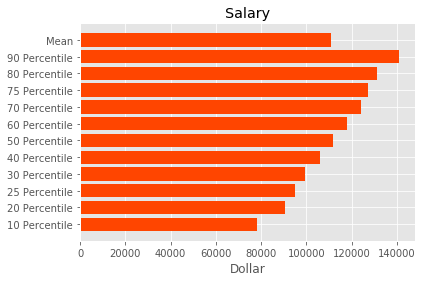

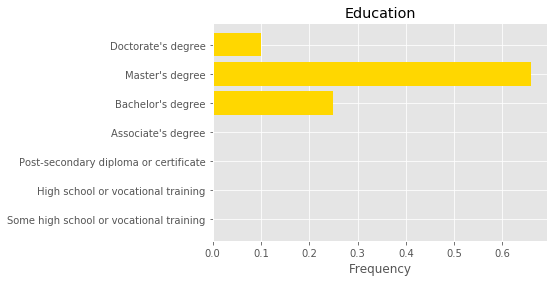

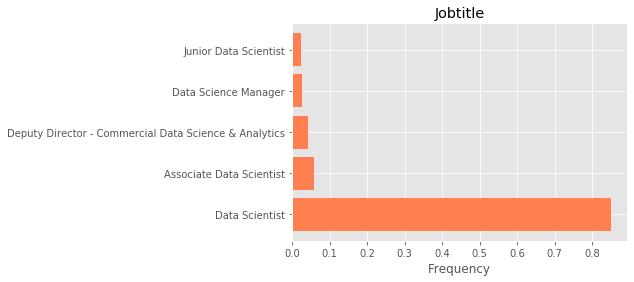

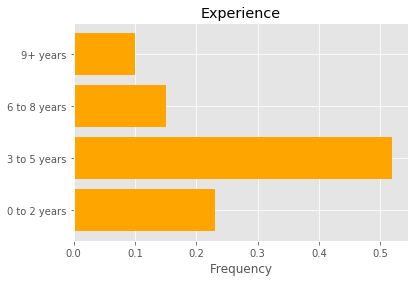

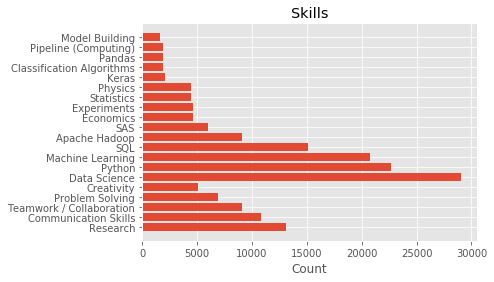

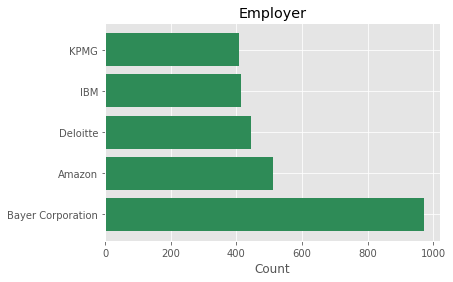

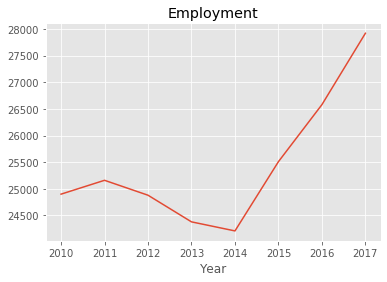

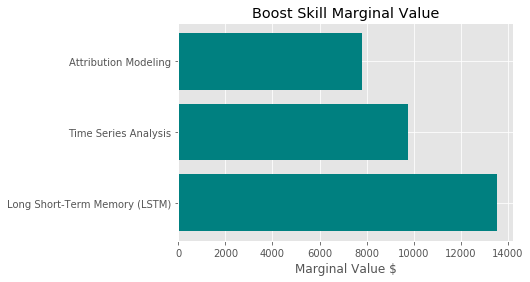

                               Marginal Value
Long Short-Term Memory (LSTM)         13561.0
Time Series Analysis                   9763.0
Attribution Modeling                   7794.0


In [27]:
vis_job('Data Scientist')

Artist / Illustrator


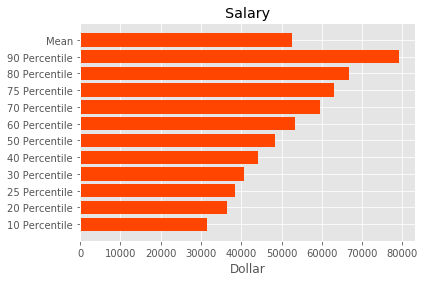

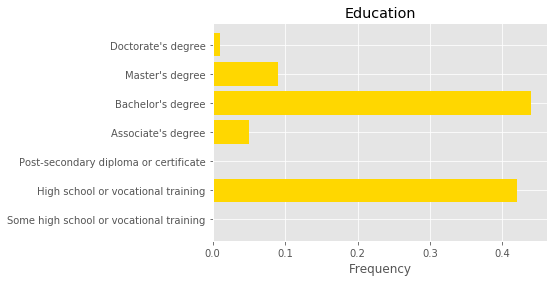

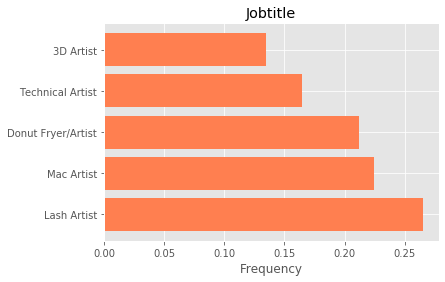

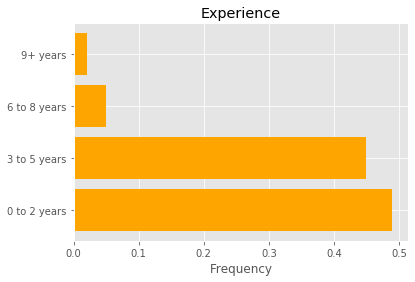

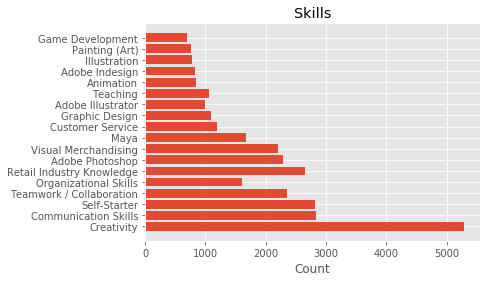

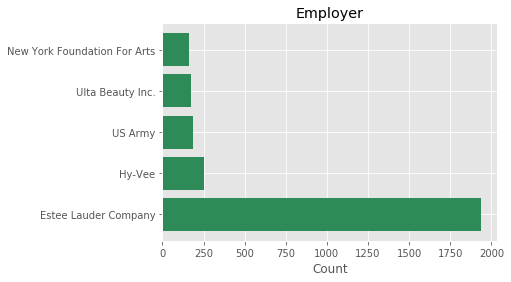

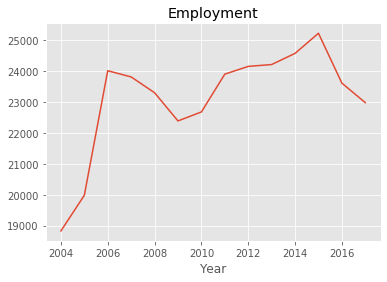

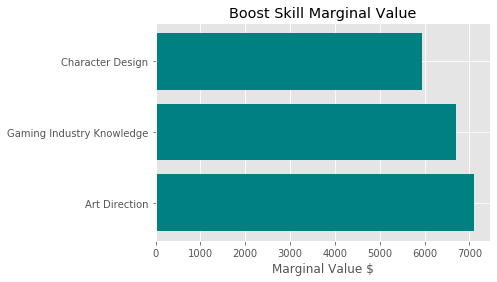

                           Marginal Value
Art Direction                      7110.0
Gaming Industry Knowledge          6701.0
Character Design                   5937.0


In [28]:
print(haveboost_name[100])
vis_job(haveboost_name[100])